# Inspect the Raw Data

In [1]:
import pandas as pd

# Load the data from the CSV file
hotel_data = pd.read_csv('bangkok_hotel_data.csv')

# Display the first few rows to inspect the data
hotel_data.head()


C:\Users\User\AppData\Local\Temp\ipykernel_2872\3383060344.py:4: DtypeWarning: Columns (3,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,355,357,359,361,363,365,367,369,371,373,375,377,379,381,383,385,387,389,391,393,395,397,399) have mixed types. Specify dtype option on import or set low_memory=False.
  hotel_data = pd.read_csv('bangkok_hotel_data.csv')


,address,addressObj/city,addressObj/country,addressObj/postalcode,addressObj/state,addressObj/street1,addressObj/street2,amenities/0,amenities/1,amenities/2,...,roomTips/4/id,roomTips/4/rating,roomTips/4/reviewId,roomTips/4/text,roomTips/4/type,roomTips/4/user,subcategories/0,type,webUrl,website
0,"7, Soi Sukhumvit 14, Sukhumvit Road Khlong Toe...",Bangkok,Thailand,10110,NaN,"7, Soi Sukhumvit 14, Sukhumvit Road","Khlong Toei, Khlong Toei",Internet,Free Internet,Wheelchair access,...,854173609.0,4.0,854173609.0,cheap price great location good for night life,room_tip,NaN,Hotel,HOTEL,https://www.tripadvisor.com/Hotel_Review-g2939...,http://www.redplanethotels.com/hotel/asoke-ban...
1,"559 Ratchaprarop Road, Makkasan, Ratchathewi A...",Bangkok,Thailand,10400,NaN,"559 Ratchaprarop Road, Makkasan, Ratchathewi",Adjacent to The Palladium World Shopping Centre,Internet,Free Internet,Wifi,...,886824325.0,5.0,886824325.0,Please use the transfer company inside the hot...,room_tip,NaN,Hotel,HOTEL,https://www.tripadvisor.com/Hotel_Review-g2939...,http://www.berkeleypratunam.com
2,"320 Silom Road Bangrak, Bangkok 10500 Thailand",Bangkok,Thailand,10500,NaN,320 Silom Road,Bangrak,Pool,Restaurant,Fitness center,...,894256220.0,4.0,894256220.0,Take bike taxi. Easier and faster way to beat ...,room_tip,NaN,Hotel,HOTEL,https://www.tripadvisor.com/Hotel_Review-g2939...,https://www.accorhotels.com/gb/hotel-7172-novo...
3,"300 Soi Sukhumvit 55 Klongton Nua Wattana, Ban...",Bangkok,Thailand,10110,NaN,300 Soi Sukhumvit 55,Klongton Nua Wattana,Pool,Internet,Shuttle Bus Service,...,731485653.0,4.0,731485653.0,Its better to sit in the lobby & enjoy beverag...,room_tip,NaN,Hotel,HOTEL,https://www.tripadvisor.com/Hotel_Review-g2939...,http://www.grandecentrepointsukhumvit55.com
4,"33/1 South Sathorn Road Yannawa, Sathon, Bangk...",Bangkok,Thailand,10120,NaN,33/1 South Sathorn Road,"Yannawa, Sathon",Internet,Free Internet,Wifi,...,903435638.0,3.0,903435638.0,During peak hours avoid making a u turn to get...,room_tip,NaN,Hotel,HOTEL,https://www.tripadvisor.com/Hotel_Review-g2939...,http://www.eastingrandsathorn.com/


# Extract the relevant columns

# The relevant paremeters should be 

# 1. Type of hotels

# 2. Hotel Ranking

# 3. Number of Rooms

# 4. Number of Amenities

In [2]:
# Extract columns that start with 'amenities/'
amenities_cols = [col for col in hotel_data.columns if col.startswith('amenities/')]

# Calculate the number of amenities for each hotel
hotel_data['num_amenities'] = hotel_data[amenities_cols].notna().sum(axis=1)

# Extract the relevant columns
relevant_data = hotel_data[['subcategories/0', 'rankingString', 'numberOfRooms', 'hotelClass', 'num_amenities']]

# Display the first few rows of the relevant data
relevant_data.head()


,subcategories/0,rankingString,numberOfRooms,hotelClass,num_amenities
0,Hotel,"#271 of 1,585 hotels in Bangkok",130.0,3.0,25
1,Hotel,"#304 of 1,585 hotels in Bangkok",788.0,5.0,53
2,Hotel,"#212 of 1,585 hotels in Bangkok",216.0,4.0,55
3,Hotel,"#206 of 1,585 hotels in Bangkok",442.0,5.0,50
4,Hotel,"#30 of 1,585 hotels in Bangkok",390.0,5.0,63


# Determine the Energy consumption base on the Number of Amenities (RANDOM)

# Determine the area per room base on the Hotel Class

In [3]:
# Assumptions for energy consumption
# RANDOM
BASE_ENERGY = 1000
ENERGY_PER_ROOM = 20
ENERGY_PER_AMENITY = 5

# Compute the energy consumption
relevant_data['energy_consumption'] = (BASE_ENERGY + 
                                      relevant_data['numberOfRooms'] * ENERGY_PER_ROOM + 
                                      relevant_data['num_amenities'] * ENERGY_PER_AMENITY)

# Assumptions for usable area based on hotel class
area_per_room = {
    1.0: 21,
    1.5: 25,
    2.0: 25,
    2.5: 28,
    3.0: 28,
    3.5: 33,
    4.0: 33,
    4.5: 47,
    5.0: 47
}

# Compute the usable area
relevant_data['usable_area'] = relevant_data['numberOfRooms'] * relevant_data['hotelClass'].map(area_per_room)

relevant_data.head()


C:\Users\User\AppData\Local\Temp\ipykernel_2872\3586448173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['energy_consumption'] = (BASE_ENERGY +
C:\Users\User\AppData\Local\Temp\ipykernel_2872\3586448173.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['usable_area'] = relevant_data['numberOfRooms'] * relevant_data['hotelClass'].map(area_per_room)


,subcategories/0,rankingString,numberOfRooms,hotelClass,num_amenities,energy_consumption,usable_area
0,Hotel,"#271 of 1,585 hotels in Bangkok",130.0,3.0,25,3725.0,3640.0
1,Hotel,"#304 of 1,585 hotels in Bangkok",788.0,5.0,53,17025.0,37036.0
2,Hotel,"#212 of 1,585 hotels in Bangkok",216.0,4.0,55,5595.0,7128.0
3,Hotel,"#206 of 1,585 hotels in Bangkok",442.0,5.0,50,10090.0,20774.0
4,Hotel,"#30 of 1,585 hotels in Bangkok",390.0,5.0,63,9115.0,18330.0


# Calculate Baseline Energy Consumption and Usable Area

In [4]:
# Calculate baseline energy consumption and usable area
average_energy_consumption = relevant_data['energy_consumption'].mean()
average_usable_area = relevant_data['usable_area'].mean()

average_energy_consumption, average_usable_area


(2704.813624678663, 2894.9955898566704)

# Plot the data

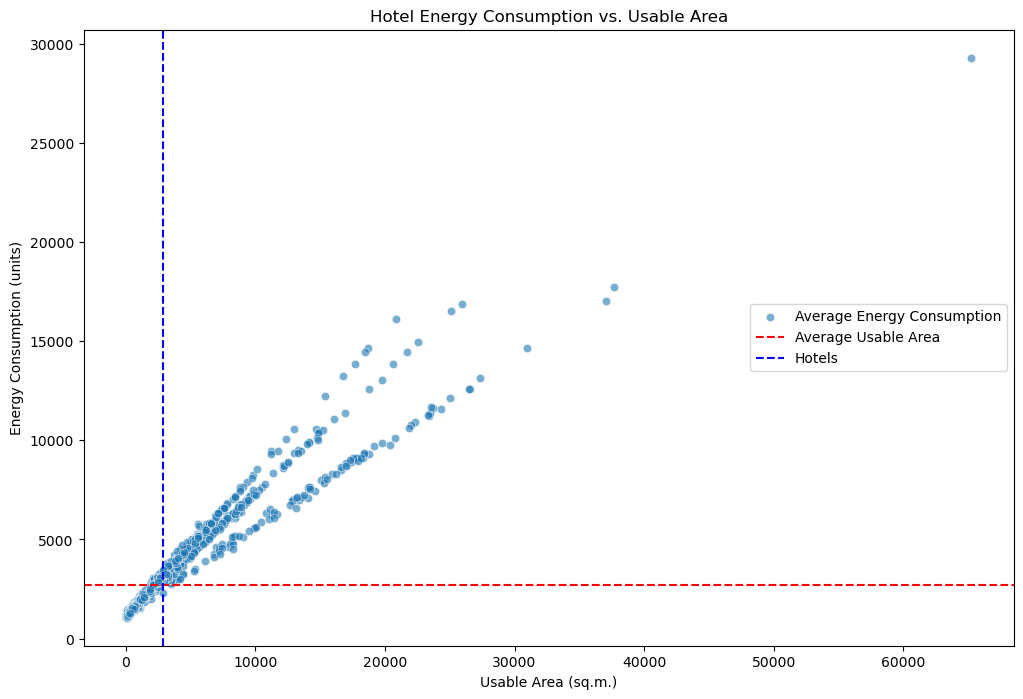

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(relevant_data['usable_area'], relevant_data['energy_consumption'], alpha=0.6, edgecolors="w", linewidth=0.5)

# Baseline
plt.axhline(y=average_energy_consumption, color='r', linestyle='--')
plt.axvline(x=average_usable_area, color='b', linestyle='--')

# Labels and title
plt.title('Hotel Energy Consumption vs. Usable Area')
plt.xlabel('Usable Area (sq.m.)')
plt.ylabel('Energy Consumption (units)')
plt.legend(['Average Energy Consumption', 'Average Usable Area', 'Hotels'])

plt.show()


# Remove Outliers

In [36]:
# Function to remove outliers
def remove_outliers(df, column_name):
    upper_bound = df[column_name].quantile(0.9)

    
    # Filter the data to remove outliers
    return df[(df[column_name] <= upper_bound)]

# Remove outliers for energy consumption and usable area
refined_data = remove_outliers(relevant_data, 'energy_consumption')
refined_data = remove_outliers(refined_data, 'usable_area')


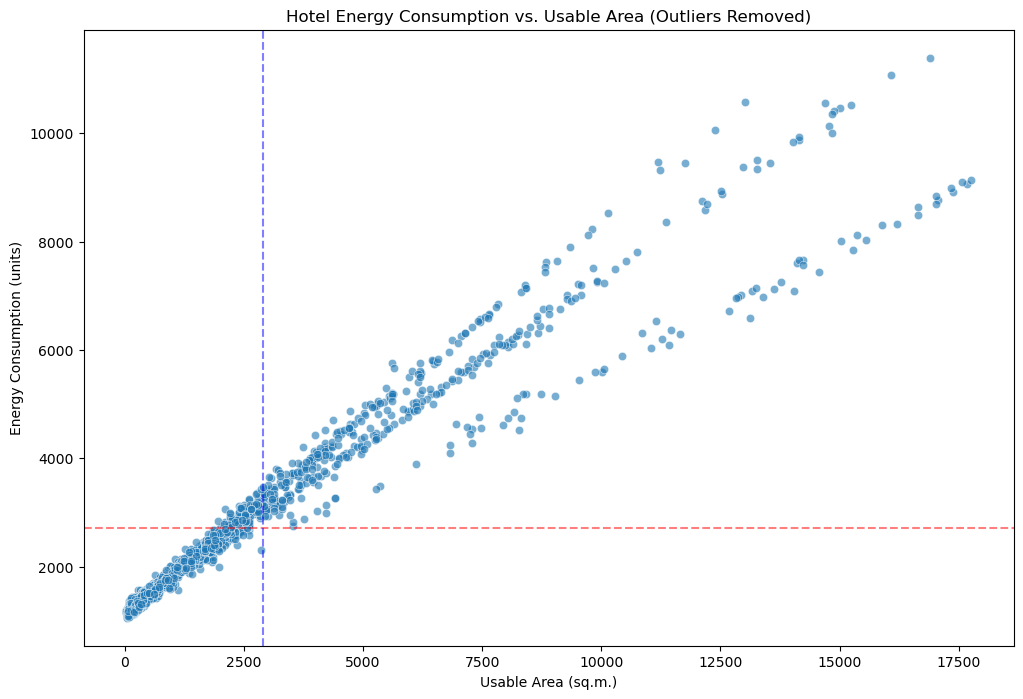

In [37]:
# Scatter plot for energy consumption vs. usable area with outliers removed (without clustering)
plt.figure(figsize=(12, 8))

plt.scatter(refined_data['usable_area'], refined_data['energy_consumption'], alpha=0.6, edgecolors="w", linewidth=0.5)

# Baseline
plt.axhline(y=average_energy_consumption, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=average_usable_area, color='b', linestyle='--', alpha=0.5)

# Labels and title
plt.title('Hotel Energy Consumption vs. Usable Area (Outliers Removed)')
plt.xlabel('Usable Area (sq.m.)')
plt.ylabel('Energy Consumption (units)')

plt.show()


# Group by Hotel Class

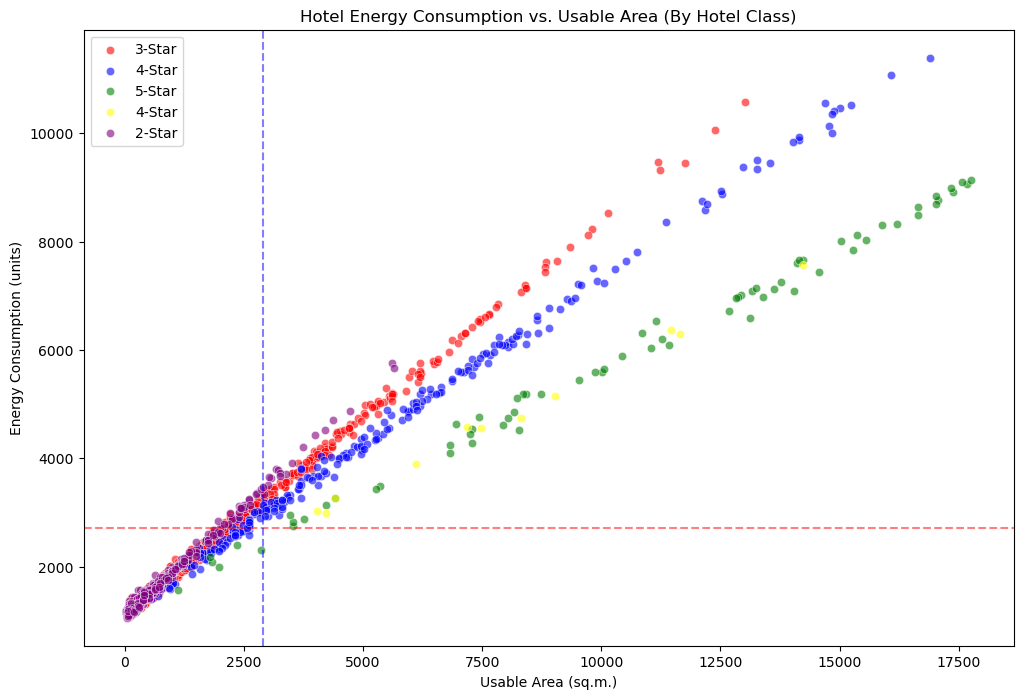

In [38]:
# Extract unique hotel classes
unique_classes = refined_data['hotelClass'].dropna().unique()

# Visualize the clusters based on hotel class
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'yellow', 'purple']

for hotel_class, color in zip(unique_classes, colors):
    subset = refined_data[refined_data['hotelClass'] == hotel_class]
    plt.scatter(subset['usable_area'], subset['energy_consumption'], c=color, label=f'{int(hotel_class)}-Star', alpha=0.6, edgecolors="w", linewidth=0.5)

# Baseline
plt.axhline(y=average_energy_consumption, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=average_usable_area, color='b', linestyle='--', alpha=0.5)

# Labels and title
plt.title('Hotel Energy Consumption vs. Usable Area (By Hotel Class)')
plt.xlabel('Usable Area (sq.m.)')
plt.ylabel('Energy Consumption (units)')
plt.legend()

plt.show()


# Group by Hotel Size

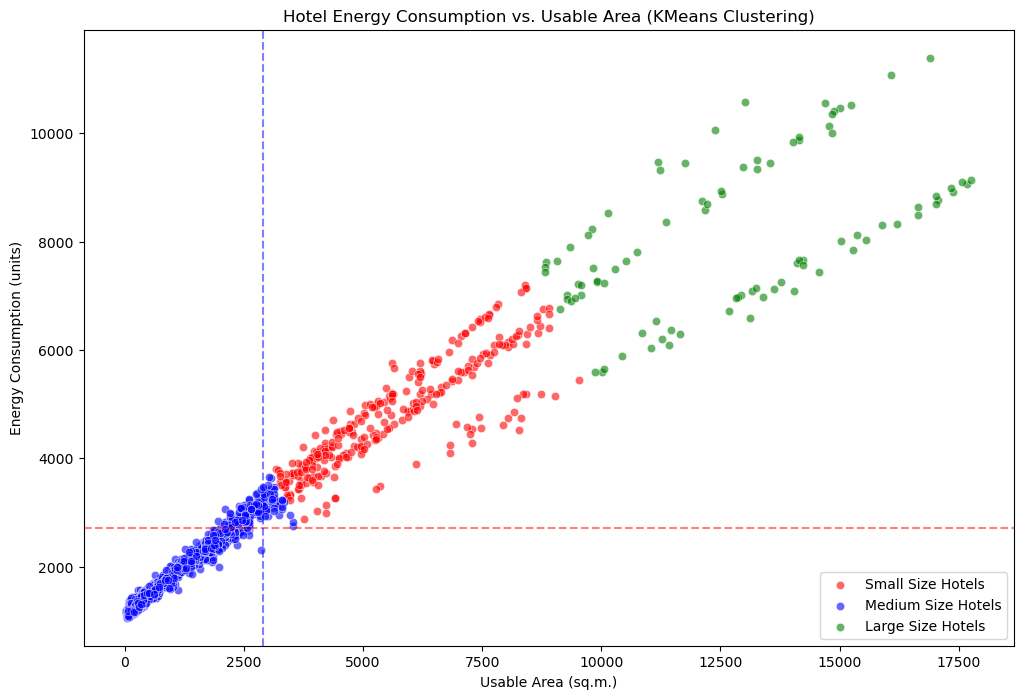

In [40]:
from sklearn.cluster import KMeans

# Data for clustering
X = refined_data[['usable_area', 'energy_consumption']]

# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
refined_data['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(12, 8))

colors = ['red', 'blue', 'green']
labels = ['Small Size Hotels', 'Medium Size Hotels', 'Large Size Hotels']

for cluster, color, label in zip(range(3), colors, labels):
    subset = refined_data[refined_data['cluster'] == cluster]
    plt.scatter(subset['usable_area'], subset['energy_consumption'], c=color, label=label, alpha=0.6, edgecolors="w", linewidth=0.5)

# Baseline
plt.axhline(y=average_energy_consumption, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=average_usable_area, color='b', linestyle='--', alpha=0.5)

# Labels, title, and legend
plt.title('Hotel Energy Consumption vs. Usable Area (KMeans Clustering)')
plt.xlabel('Usable Area (sq.m.)')
plt.ylabel('Energy Consumption (units)')
plt.legend()

plt.show()


# Calculate the Average of Energy Consumption and Usable Area of each class before plotting

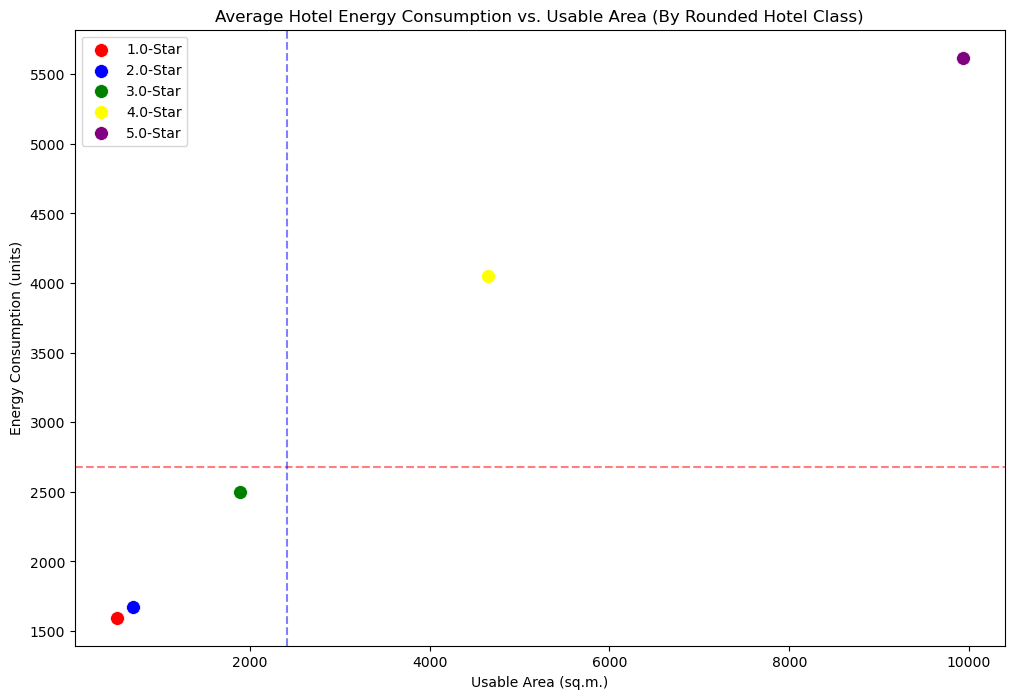

In [56]:
# Round up the 0.5 values in the hotelClass column
refined_data['rounded_hotelClass'] = refined_data['hotelClass'].apply(lambda x: int(x) + 1 if x % 1 == 0.5 else round(x))

# Group by the rounded hotel class
grouped_rounded_data = refined_data.groupby('rounded_hotelClass').mean()[['energy_consumption', 'usable_area']].reset_index()

# Plot the average values for the rounded hotel class
plt.figure(figsize=(12, 8))
for index, row in grouped_rounded_data.iterrows():
    color = colors_map[row['rounded_hotelClass']]
    plt.scatter(row['usable_area'], row['energy_consumption'], color=color, label=f"{row['rounded_hotelClass']}-Star", s=100, edgecolors="w", linewidth=0.5)

# Baseline
plt.axhline(y=average_energy_consumption, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=average_usable_area, color='b', linestyle='--', alpha=0.5)

# Labels and title
plt.title('Average Hotel Energy Consumption vs. Usable Area (By Rounded Hotel Class)')
plt.xlabel('Usable Area (sq.m.)')
plt.ylabel('Energy Consumption (units)')
plt.legend()

plt.show()
